In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1 align='center'>Ben Prescott, Assignment 3 - Part 2, MSDS422, WI2021</h1>

In [3]:
import numpy as np
import pandas as pd
import os
import glob
from numpy import asarray, save, load
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow
from PIL import Image
import matplotlib.pyplot as plt
import shutil
from shutil import copy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from timeit import default_timer as timer
%matplotlib inline


## Objective 0: Data Input, Transformation

In this section I'll be importing and sorting data into arrays in RAM. As part of the array creation we'll be giving those with 'dog' in the name a label of 1 and cats a label of 0. We'll also be rescaling pixels to a range of 0 to 1.

In [5]:
root = 'C:/Users/bprescott/Documents/'

In [6]:
os.chdir(root + 'trainimages')    # Where the training images are, locally

myImgs = []      # Where the np arrays of the image data will be
imgLabels = []    # where the labels for the images will be, dog=1, cat=0

for filNam in glob.glob('*.jpg'):
    
    theLabel=0
    if filNam.startswith('dog'):
        theLabel=1
    animalImg=load_img(filNam, target_size=(200,200))  # you can adjust the size, here.
    animalImg=img_to_array(animalImg) # convert to array
    # 
    # This can be a good place to rescale pixels from [0, 255] to [0,1]
    #
    animalImg=np.divide(animalImg,255.)  #default dtype should be float32
    myImgs.append(animalImg)
    imgLabels.append(theLabel)
#  Array conversions

myImgs=asarray(myImgs)
imgLabels=asarray(imgLabels)

In [7]:
os.mkdir(root + 'imgArrayData')
os.chdir(root + 'imgArrayData')
save('myImgs.npy',myImgs)
save('imLabels.npy',imgLabels)

In [6]:
imgArray=load(root+'imgArrayData/'+'myImgs.npy')
labelArray=load(root+'imgArrayData/'+'imLabels.npy')

In [6]:
imgArray.shape
labelArray.shape

(5000, 200, 200, 3)

(5000,)

Checking out a random image from the dataset. Pretty cute dog.

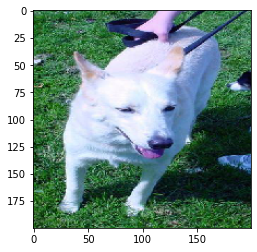

In [7]:
plt.imshow(imgArray[3000,:,:]);

In [9]:
X = imgArray
y = labelArray

In [10]:
#Creating train & test split
X_train_f , X_test , y_train_f , y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20,  random_state=33)

#Creating validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_f, y_train_f, train_size = 0.75, test_size = .25, random_state=34)

#Reviewing shapes of different objects
print(' X_train:',X_train.shape,'\n','y_train:',y_train.shape,'\n','X_test:',X_test.shape,'\n','y_test:',y_test.shape,'\n','X_valid:',X_valid.shape,'\n','y_valid:',y_valid.shape)

 X_train: (3000, 200, 200, 3) 
 y_train: (3000,) 
 X_test: (1000, 200, 200, 3) 
 y_test: (1000,) 
 X_valid: (1000, 200, 200, 3) 
 y_valid: (1000,)


## Part 2, Objective 1 : Train and Evaluate Four Versions of a CNN That Predict Dog or Cat

When training the following models the hyperparameters that I'll be adjusting are: number of conv/pooling layer pairs, number of neurons per layer, number of filters, kernel size and stride.

Each model will use the same activation functions, padding, steps_per_epoch, number of epochs, and validation steps. Each model will also use the same loss function, optimizer and metric output. 

### Model 1

2 convolutional layers, 2 pooling layers and one hidden layer with one dropout layer, with 50% split of units dropped.

In [13]:
#Defining the model
model1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(4,4),activation='relu',padding = 'same',input_shape = X_train.shape[1:]),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=64,kernel_size=(4,4),activation='relu',padding = 'same'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
])

In [14]:
#Compiling the model. Using binary crossentropy as we are predicting a 1 or 0. 
#Sticking with the Adam optimizer and the accuracy metric 
model1.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=1e-4),
             metrics=['acc'])

In [15]:
#Fitting the model. Using 100 steps per epoch, 10 epochs.
model1output = model1.fit(
    X_train,y_train,
    steps_per_epoch=100,
    epochs=10,
    validation_data = (X_valid,y_valid),
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 12s 96ms/step - loss: 0.7287 - acc: 0.5055 - val_loss: 0.6920 - val_acc: 0.5110
Epoch 2/10
100/100 [==============================] - 9s 92ms/step - loss: 0.6942 - acc: 0.4810 - val_loss: 0.6925 - val_acc: 0.5380
Epoch 3/10
100/100 [==============================] - 9s 91ms/step - loss: 0.6922 - acc: 0.5026 - val_loss: 0.6910 - val_acc: 0.5120
Epoch 4/10
100/100 [==============================] - 9s 92ms/step - loss: 0.6894 - acc: 0.5184 - val_loss: 0.6915 - val_acc: 0.6200
Epoch 5/10
100/100 [==============================] - 9s 92ms/step - loss: 0.6889 - acc: 0.5496 - val_loss: 0.6872 - val_acc: 0.5410
Epoch 6/10
100/100 [==============================] - 9s 92ms/step - loss: 0.6858 - acc: 0.5218 - val_loss: 0.6849 - val_acc: 0.5090
Epoch 7/10
100/100 [==============================] - 9s 92ms/step - loss: 0.6855 - acc: 0.5273 - val_loss: 0.6698 - val_acc: 0.5680
Epoch 8/10
100/100 [==============================] - 9s 93ms/step -

In [28]:
y_proba = model1.predict(X_test[:5])
predicted = pd.DataFrame(y_proba.round(2))
actuals = pd.DataFrame(y_test[:5])
predicted['probability_is_dog'] = predicted
predicted['is_dog'] = actuals
predicted.drop([0], axis=1, inplace=True)
predicted

,probability_is_dog,is_dog
0,0.56,1
1,0.37,0
2,0.55,1
3,0.51,0
4,0.41,0


In [43]:
#Creating a dataframe for later review
t1 = pd.DataFrame(model1output.history)
t1 = t1.loc[t1['val_acc'][::-1].idxmax()]
t1

loss        0.654238
acc         0.575333
val_loss    0.646967
val_acc     0.679000
Name: 8, dtype: float64

### Model 2 (Best Model)

Keeping the same layer setup, but changing the kernel size and stride.

In [30]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding = 'same',input_shape = X_train.shape[1:]),
    keras.layers.MaxPooling2D(pool_size =(3,3), strides=(3,3)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding = 'same'),
    keras.layers.MaxPooling2D(pool_size =(3,3), strides=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
    ])

In [31]:
model2.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=1e-4),
             metrics=['acc'])

In [32]:
model2output = model2.fit(
    X_train,y_train,
    steps_per_epoch=100,
    epochs=10,
    validation_data = (X_valid,y_valid),
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 6s 48ms/step - loss: 0.7008 - acc: 0.5117 - val_loss: 0.6846 - val_acc: 0.5280
Epoch 2/10
100/100 [==============================] - 4s 44ms/step - loss: 0.6788 - acc: 0.5507 - val_loss: 0.6639 - val_acc: 0.6220
Epoch 3/10
100/100 [==============================] - 4s 45ms/step - loss: 0.6615 - acc: 0.6071 - val_loss: 0.6609 - val_acc: 0.6120
Epoch 4/10
100/100 [==============================] - 4s 45ms/step - loss: 0.6413 - acc: 0.6367 - val_loss: 0.6230 - val_acc: 0.6690
Epoch 5/10
100/100 [==============================] - 4s 45ms/step - loss: 0.6151 - acc: 0.6646 - val_loss: 0.6078 - val_acc: 0.6880
Epoch 6/10
100/100 [==============================] - 5s 45ms/step - loss: 0.6008 - acc: 0.6737 - val_loss: 0.6080 - val_acc: 0.6540
Epoch 7/10
100/100 [==============================] - 4s 45ms/step - loss: 0.6028 - acc: 0.6702 - val_loss: 0.5876 - val_acc: 0.7130
Epoch 8/10
100/100 [==============================] - 5s 45ms/step - 

In [42]:
#Creating a dataframe for later review
t2 = pd.DataFrame(model2output.history)
t2 = t2.loc[t2['val_acc'][::-1].idxmax()]
t2

loss        0.557252
acc         0.723667
val_loss    0.570353
val_acc     0.716000
Name: 8, dtype: float64

### Model 3

The last model showed improvement so going to continue to expand on that. Adding two additional conv2D layers and pooling layers.

In [37]:
model3 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding = 'same',input_shape = X_train.shape[1:]),
    keras.layers.MaxPooling2D(pool_size =(3,3), strides=(3,3)),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding = 'same'),
    keras.layers.MaxPooling2D(pool_size =(3,3), strides=(3,3)),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding = 'same'),
    keras.layers.MaxPooling2D(pool_size =(3,3), strides=(3,3)),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding = 'same'),
    keras.layers.MaxPooling2D(pool_size =(3,3), strides=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
    ])

In [38]:
model3.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=1e-4),
             metrics=['acc'])

In [39]:
model3output = model3.fit(
    X_train,y_train,
    steps_per_epoch=100,
    epochs=10,
    validation_data = (X_valid,y_valid),
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 5s 43ms/step - loss: 0.6945 - acc: 0.4922 - val_loss: 0.6905 - val_acc: 0.5110
Epoch 2/10
100/100 [==============================] - 4s 40ms/step - loss: 0.6916 - acc: 0.5174 - val_loss: 0.6885 - val_acc: 0.5140
Epoch 3/10
100/100 [==============================] - 4s 40ms/step - loss: 0.6902 - acc: 0.5379 - val_loss: 0.6863 - val_acc: 0.6020
Epoch 4/10
100/100 [==============================] - 4s 40ms/step - loss: 0.6871 - acc: 0.5562 - val_loss: 0.6822 - val_acc: 0.5990
Epoch 5/10
100/100 [==============================] - 4s 40ms/step - loss: 0.6823 - acc: 0.5691 - val_loss: 0.6747 - val_acc: 0.6140
Epoch 6/10
100/100 [==============================] - 4s 40ms/step - loss: 0.6789 - acc: 0.5634 - val_loss: 0.6701 - val_acc: 0.6170
Epoch 7/10
100/100 [==============================] - 4s 40ms/step - loss: 0.6743 - acc: 0.5959 - val_loss: 0.6661 - val_acc: 0.5970
Epoch 8/10
100/100 [==============================] - 4s 40ms/step - 

In [41]:
#Creating a dataframe for later review
t3 = pd.DataFrame(model3output.history)
t3 = t3.loc[t3['val_acc'][::-1].idxmax()]
t3

loss        0.657853
acc         0.621333
val_loss    0.649619
val_acc     0.638000
Name: 8, dtype: float64

### Model 4
5 convolutional layers, 5 pooling layers and 4 hidden layers with 4 dropout layers, each with 25% split of units dropped.

In [123]:
model4 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding = 'same',input_shape = X_train.shape[1:]),
    keras.layers.MaxPooling2D(pool_size =(3,3), strides=(3,3)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding = 'same'),
    keras.layers.MaxPooling2D(pool_size =(3,3), strides=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
    ])

In [124]:
model4.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=1e-4),
             metrics=['acc'])

In [125]:
model4output = model4.fit(
    X_train,y_train,
    steps_per_epoch=100,
    epochs=10,
    validation_data = (X_valid,y_valid),
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 5s 47ms/step - loss: 0.6964 - acc: 0.5208 - val_loss: 0.6908 - val_acc: 0.5110
Epoch 2/10
100/100 [==============================] - 4s 45ms/step - loss: 0.6904 - acc: 0.5321 - val_loss: 0.6879 - val_acc: 0.5450
Epoch 3/10
100/100 [==============================] - 4s 44ms/step - loss: 0.6862 - acc: 0.5310 - val_loss: 0.6815 - val_acc: 0.5980
Epoch 4/10
100/100 [==============================] - 4s 44ms/step - loss: 0.6840 - acc: 0.5494 - val_loss: 0.6827 - val_acc: 0.5930
Epoch 5/10
100/100 [==============================] - 4s 44ms/step - loss: 0.6827 - acc: 0.5394 - val_loss: 0.6716 - val_acc: 0.5660
Epoch 6/10
100/100 [==============================] - 4s 45ms/step - loss: 0.6749 - acc: 0.5793 - val_loss: 0.6696 - val_acc: 0.5320
Epoch 7/10
100/100 [==============================] - 4s 45ms/step - loss: 0.6775 - acc: 0.5629 - val_loss: 0.6758 - val_acc: 0.6140
Epoch 8/10
100/100 [==============================] - 4s 45ms/step - 

In [168]:
pd.DataFrame(model4output.history)

,loss,acc,val_loss,val_acc
0,0.342824,0.860667,0.561503,0.744
1,0.327469,0.863000,0.502310,0.769
2,0.316357,0.867667,0.532349,0.766
3,0.299651,0.881333,0.500141,0.770
4,0.284448,0.881667,0.562001,0.764
5,0.260145,0.892667,0.507057,0.774
6,0.249635,0.897667,0.576845,0.771
7,0.243146,0.899667,0.785357,0.734
8,0.231865,0.905000,0.602714,0.761
9,0.221411,0.911667,0.624619,0.762


Creating a dataframe to show probability predictions using the best model (Model 4).

,probability_is_dog,is_dog
0,0.50,1
1,0.48,0
2,0.50,1
3,0.51,0
4,0.48,0
5,0.49,1
6,0.50,1
7,0.51,1
8,0.50,0
9,0.50,1


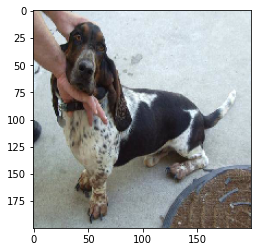

In [178]:
y_proba = model3.predict(X_test)
predicted = pd.DataFrame(y_proba.round(2))
actuals = pd.DataFrame(y_test)
predicted['is_dog'] = actuals
predicted.rename(columns={predicted.columns[0]:'probability_is_dog'},inplace=True)
predicted[:40]
plt.imshow(X_test[0,:,:])

### Visualizing Results

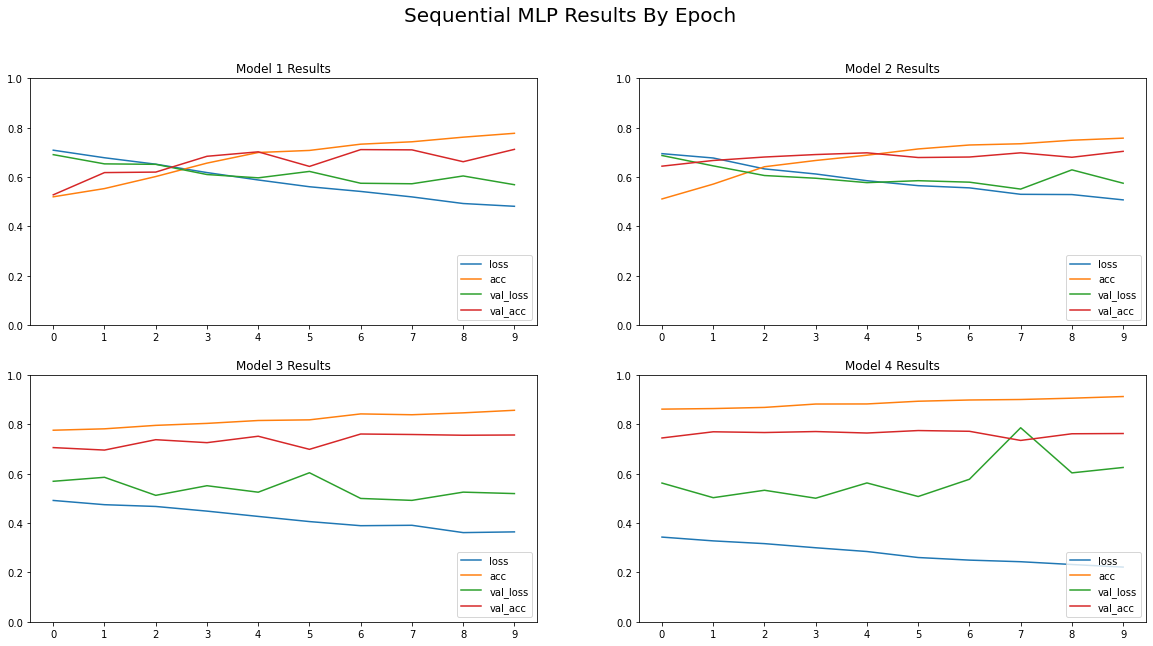

In [177]:
fig, ((ax1, ax2), (ax3 ,ax4)) = plt.subplots(2, 2,  figsize=(20,10))
fig.suptitle('Sequential MLP Results By Epoch', fontsize = 20)
ax1.plot(pd.DataFrame(model1output.history))
ax1.set_title('Model 1 Results')
ax1.set_ylim(0,1)
ax1.set_xticks(np.arange(0,10))
ax1.legend(pd.DataFrame(model1output.history), loc="lower right")
ax2.plot(pd.DataFrame(model2output.history))
ax2.set_title('Model 2 Results')
ax2.set_ylim(0,1)
ax2.set_xticks(np.arange(0,10))
ax2.legend(pd.DataFrame(model1output.history), loc="lower right")
ax3.plot(pd.DataFrame(model3output.history))
ax3.set_title('Model 3 Results')
ax3.set_ylim(0,1)
ax3.set_xticks(np.arange(0,10))
ax3.legend(pd.DataFrame(model1output.history), loc="lower right")
ax4.plot(pd.DataFrame(model4output.history))
ax4.set_title('Model 4 Results')
ax4.set_ylim(0,1)
ax4.set_xticks(np.arange(0,10))
ax4.legend(pd.DataFrame(model1output.history), loc="lower right")
plt.show;